In [16]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

import itertools

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np

In [17]:
#loading the file
df = pd.read_excel('Core_Swi_23.xlsx')

In [18]:
#top head list
df.head()

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,TOC1,Mineral,Wat_Per,TOC_Per,QC,PS,S2,TOC3,PS2,PS3,PS4
0,2773.88,4.389823,0.000000,7.059657,7.113304,40.625792,19.270550,40.625792,1.007599,0.621818,-40.625792,-0.053647,0.005060,0.092058,50.217483,0.084014,0.035721
1,2776.00,4.386618,6.364645,6.336578,9.364680,51.606889,19.242421,57.971534,1.477877,0.692269,-45.242245,-3.028102,0.008770,0.068213,59.340029,0.013945,0.055570
2,2778.13,3.445457,2.639268,4.697208,5.931133,41.462293,11.871172,44.101561,1.262693,0.733512,-38.823025,-1.233925,0.003518,0.070605,27.859765,0.011315,0.016524
3,2780.25,-0.310000,67.332860,6.321279,11.776418,4.069170,0.096100,71.402031,1.862980,-0.049041,63.263690,-5.455139,0.013868,-0.003989,74.442022,0.004510,0.087666
4,2782.48,4.059924,0.618621,5.686218,7.382626,38.091079,16.482983,38.709700,1.298337,0.713994,-37.472458,-1.696408,0.005450,0.091448,41.979219,0.015487,0.030992


In [19]:
#columns
df.columns

Index(['Depth', 'TOC', 'Calcite', 'Porosity', 'Swirr', 'Quartz', 'TOC1',
       'Mineral', 'Wat_Per', 'TOC_Per', 'QC', 'PS', 'S2', 'TOC3', 'PS2', 'PS3',
       'PS4'],
      dtype='object')

In [20]:
#shape of the data
df.shape

(192, 17)

In [21]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     192 non-null    float64
 1   TOC       192 non-null    float64
 2   Calcite   192 non-null    float64
 3   Porosity  190 non-null    float64
 4   Swirr     192 non-null    float64
 5   Quartz    192 non-null    float64
 6   TOC1      192 non-null    float64
 7   Mineral   192 non-null    float64
 8   Wat_Per   190 non-null    float64
 9   TOC_Per   190 non-null    float64
 10  QC        192 non-null    float64
 11  PS        190 non-null    float64
 12  S2        192 non-null    float64
 13  TOC3      190 non-null    float64
 14  PS2       190 non-null    float64
 15  PS3       190 non-null    float64
 16  PS4       190 non-null    float64
dtypes: float64(17)
memory usage: 25.6 KB


In [22]:
#describin the data 
df.describe()

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,TOC1,Mineral,Wat_Per,TOC_Per,QC,PS,S2,TOC3,PS2,PS3,PS4
count,192.000000,192.000000,192.000000,190.000000,192.000000,192.000000,192.000000,192.000000,190.000000,190.000000,192.000000,190.000000,192.000000,190.000000,190.000000,1.900000e+02,190.000000
mean,2980.248872,3.869396,13.177719,4.343813,10.772870,29.441638,17.847483,42.619357,2.997601,0.937791,-16.263920,-6.382774,0.014011,0.099013,44.520906,1.807559e-02,0.055359
std,123.986170,1.700091,20.524541,1.423776,4.917624,14.812371,13.209178,15.835459,2.184789,0.550717,32.102406,5.453302,0.013155,0.066123,21.566029,5.909128e-02,0.049780
min,2773.880000,-0.310000,0.000000,0.695030,2.532676,0.000000,0.096100,2.364779,0.388097,-0.049041,-62.110587,-24.171977,0.000641,-0.003989,5.991988,2.463177e-16,0.002564
25%,2874.485000,2.629111,0.000000,3.475589,7.109355,17.419381,6.912222,31.768091,1.413643,0.640180,-38.408120,-9.771144,0.005054,0.057373,28.066220,2.399025e-06,0.022464
50%,2972.865000,4.020012,2.843514,4.434661,10.223862,30.459449,16.160499,41.635001,2.328337,0.805213,-28.821132,-6.029476,0.010453,0.090834,40.369581,2.686075e-04,0.037290
75%,3084.340000,5.079729,17.224044,5.203863,13.452185,40.960765,25.803648,53.416631,3.607545,1.092348,-4.476986,-1.903312,0.018096,0.135073,59.270148,8.020231e-03,0.074841
max,3196.123333,7.770700,85.867678,8.487825,28.013512,62.110587,60.383773,85.867678,12.404051,5.063122,85.867678,5.193724,0.078476,0.439207,107.614895,5.827042e-01,0.301467


In [23]:
#searching the null
df.isnull().sum()

Depth       0
TOC         0
Calcite     0
Porosity    2
Swirr       0
Quartz      0
TOC1        0
Mineral     0
Wat_Per     2
TOC_Per     2
QC          0
PS          2
S2          0
TOC3        2
PS2         2
PS3         2
PS4         2
dtype: int64

In [24]:
# The null values replaced with mean,median and most frequent values of the data

df['Porosity'].fillna(np.mean(df['Porosity']))
df['Wat_Per'].fillna(np.mean(df['Wat_Per']))
df['TOC_Per'].fillna(np.median(df['TOC_Per']),inplace=True)



In [25]:
# now replacing remaining missing values with bfill method 
df.fillna(method='bfill', inplace=True)


In [26]:
# now checking missing values
df.isnull().sum()

Depth       0
TOC         0
Calcite     0
Porosity    0
Swirr       0
Quartz      0
TOC1        0
Mineral     0
Wat_Per     0
TOC_Per     0
QC          0
PS          0
S2          0
TOC3        0
PS2         0
PS3         0
PS4         0
dtype: int64

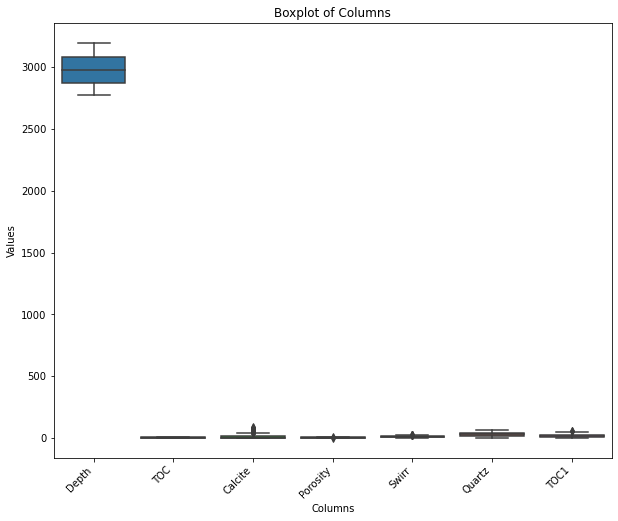

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['Depth', 'TOC', 'Calcite', 'Porosity', 'Swirr', 'Quartz', 'TOC1']
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df[columns], ax=ax)
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Boxplot of Columns')
plt.show()


In [28]:
# The columns calcite, Porosity columns, Swirr, TOC1 having outliers

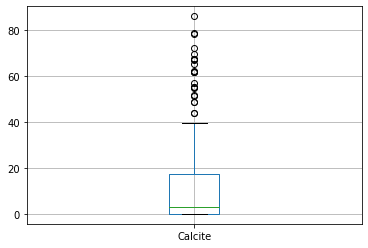

In [30]:
# example for the above columns
df.boxplot('Calcite')

plt.show()


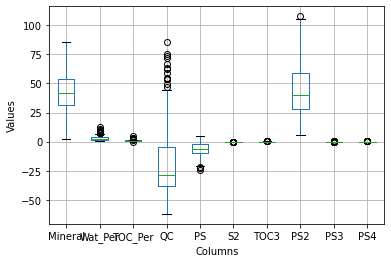

In [32]:
df.boxplot(column=['Mineral', 'Wat_Per', 'TOC_Per', 'QC', 'PS', 'S2', 'TOC3', 'PS2', 'PS3',
       'PS4'])
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [15]:
# The columns Wat_Per, TOC_Per,QC, PS, S2, TOC3, PS2, PS3, PS4 having oultiers 

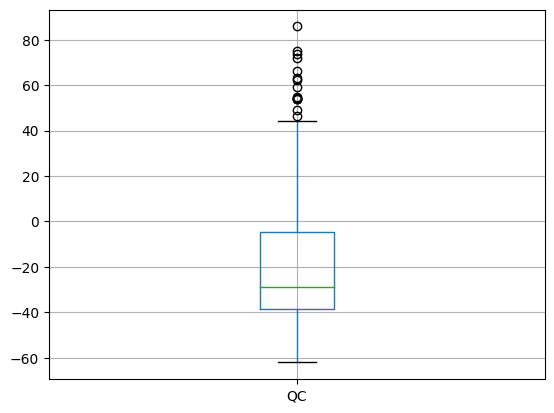

In [16]:
# example for the above column
df.boxplot('QC')
plt.show()

In [33]:
#replacing outliers 
for cl in df.columns:
  if(df[cl].dtype!='object') : 
    q_75,q_25 = np.percentile(df.loc[:,cl],[75,25])
    intr_qr = q_75-q_25
 
    max = q_75+(1.5*intr_qr)
    min = q_25-(1.5*intr_qr)
 
    df.loc[df[cl] < min,cl] = min
    df.loc[df[cl] > max,cl] = max


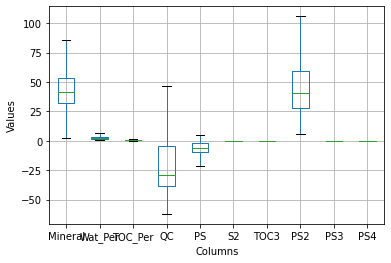

In [34]:
# after replacing outliers 
df.boxplot(column=['Mineral', 'Wat_Per', 'TOC_Per', 'QC', 'PS', 'S2', 'TOC3', 'PS2', 'PS3',
       'PS4'])
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [35]:
# scaling is done using the Min Max Scalar
from sklearn.preprocessing import MinMaxScaler
X = df.drop('Swirr',axis=1)
y = df['Swirr']
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[0.00000000e+00 5.81610960e-01 0.00000000e+00 ... 4.43298305e-01
  1.00000000e+00 2.21226417e-01]
 [5.02080159e-03 5.81214322e-01 1.47808367e-01 ... 5.34738991e-01
  6.57491474e-01 3.53659747e-01]
 [1.00652862e-02 4.64744008e-01 6.12926333e-02 ... 2.19193667e-01
  5.33451429e-01 9.31406161e-02]
 ...
 [9.90716254e-01 1.51873362e-01 1.00000000e+00 ... 1.94960338e-01
  6.97717445e-09 2.12718961e-01]
 [9.95358127e-01 1.88848378e-01 1.00000000e+00 ... 1.51805362e-01
  1.34690771e-06 1.33884052e-01]
 [1.00000000e+00 1.95238380e-01 1.00000000e+00 ... 2.33621555e-01
  1.20664671e-06 2.22013782e-01]]


In [36]:
# importing the modules to build the model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [37]:
from sklearn.model_selection import train_test_split
# Train and test data split
X_train, X_test, y_train, y_test  = train_test_split(scaled_X, y, test_size = 0.3, random_state = 100)

In [38]:
m1 = SVR(kernel='poly',degree=2)
m2 = SVR(kernel='RBF')
m3 = GradientBoostingRegressor()
m4 = RandomForestRegressor()

In [39]:
# Hypere parameter validation for SVM polynomial regressor 
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
m1  = SVR(kernel='poly')
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['poly'],
             'degree':[2]}
random = RandomizedSearchCV(m1, param_grid,cv=5,random_state=0)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(kernel='poly'),
                   param_distributions={'C': [0.1, 1, 10, 100], 'degree': [2],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['poly']},
                   random_state=0)

In [40]:
random.best_params_

{'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 10}

In [41]:
# best SVR poly regression model
model_1 = SVR(kernel= 'poly', gamma= 1, degree= 2, C= 10)
model_1.fit(X_train,y_train)

SVR(C=10, degree=2, gamma=1, kernel='poly')

In [42]:
# finding the metrics for this model 
from sklearn import metrics
y_pred_test = model_1.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.39116186075540865
MSE is 2.0455521956276175
R2 score is 0.9148252925850076


In [43]:
# Hyper parameter tuning for the SVM RBF kernel
m2  = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']
             }
random = RandomizedSearchCV(m2, param_grid,cv=5,random_state=0)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [44]:
random.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}

In [45]:
# best model for the svr rbf kernel
model_2 = SVR(kernel= 'rbf', gamma= 0.1, C= 100)
model_2.fit(X_train,y_train)

SVR(C=100, gamma=0.1)

In [46]:
y_pred_test = model_2.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.3995560781197706
MSE is 2.232877231372976
R2 score is 0.9070252691266874


In [47]:
#Hyper parameter tuning for the Gradient boosting regressor 
m3 = GradientBoostingRegressor()
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01,0.1],
           'n_estimators': [100,200,500]
           }
clf = RandomizedSearchCV(estimator = m3, param_distributions = params, n_iter = 100, 
                               cv = 5, verbose=2, random_state=42, n_jobs = -1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, verbose=2)

In [48]:
clf.best_params_

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

In [49]:
# best model for gradient boost regressor
model_3 = GradientBoostingRegressor(n_estimators= 200, max_depth= 3, learning_rate= 0.1)
model_3.fit(X_train,y_train)


GradientBoostingRegressor(n_estimators=200)

In [50]:
# Test data results
y_pred_test = model_3.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.11278809700895887
MSE is 0.15525858879621987
R2 score is 0.9935351906919563


In [51]:
# Hyper parameter tuning for the random forest regressor 
m4 = RandomForestRegressor()
params = { 'bootstrap': [True],
    'max_depth': [30,50,70],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200]}
clf = RandomizedSearchCV(estimator = m4, param_distributions = params, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [30, 50, 70],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [52]:
clf.best_params_

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 70,
 'bootstrap': True}

In [53]:
# best random forest regressor
model_4 = RandomForestRegressor(n_estimators= 50,
 min_samples_split= 8,
 min_samples_leaf=3,
 max_features=3,
 max_depth=30,
 bootstrap=True)
model_4.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=50)

In [38]:
# Test data results
y_pred_test = model_4.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.814193473495146
MSE is 3.152205483060764
R2 score is 0.8687453782379492


### subplots of actual vs predicted labels without dimensionality reduction 

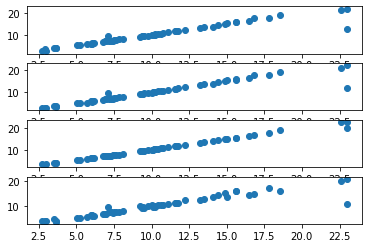

In [55]:
y_pred_test_svm_p = model_1.predict(X_test)
y_pred_test_svm_rbf = model_2.predict(X_test)
y_pred_test_grb  = model_3.predict(X_test)
y_pred_test_rf = model_4.predict(X_test)

x1 = y_test
y1 = y_pred_test_svm_p

plt.subplot(4,1,1)
plt.scatter(x1,y1)

x2 = y_test
y2 = y_pred_test_svm_rbf

plt.subplot(4,1,2)
plt.scatter(x2,y2)

x3 = y_test
y3 = y_pred_test_grb

plt.subplot(4,1,3)
plt.scatter(x3,y3)

x4 = y_test
y4 = y_pred_test_rf
plt.subplot(4,1,4)
plt.scatter(x4,y4)

plt.show()





In [40]:
# correlation coefficients
df_1 = df.drop('Swirr',axis=1)
df_1.corr()

,Depth,TOC,Calcite,Porosity,Quartz,TOC1,Mineral,Wat_Per,TOC_Per,QC,PS,S2,TOC3,PS2,PS3,PS4
Depth,1.000000,0.217064,-0.190753,-0.076517,0.083436,0.200338,-0.194137,0.033945,0.294391,-0.158995,-0.097642,0.105863,0.220525,0.046587,-0.084547,0.093585
TOC,0.217064,1.000000,-0.775507,0.391036,0.565360,0.968191,-0.458886,0.013070,0.788024,-0.747719,-0.355772,0.541730,0.779773,0.776672,-0.125427,0.726529
Calcite,-0.190753,-0.775507,1.000000,-0.626263,-0.635366,-0.656298,0.657791,0.467772,-0.449248,0.915402,-0.212836,0.020559,-0.700519,-0.390816,-0.305619,-0.252716
Porosity,-0.076517,0.391036,-0.626263,1.000000,0.652501,0.276244,-0.184142,-0.752706,-0.198131,-0.704549,0.535198,-0.272651,0.203751,0.377836,0.613432,0.087859
Quartz,0.083436,0.565360,-0.635366,0.652501,1.000000,0.450072,0.104261,-0.435400,0.194660,-0.887440,0.225863,-0.058928,0.073644,0.417673,0.268838,0.202764
TOC1,0.200338,0.968191,-0.656298,0.276244,0.450072,1.000000,-0.387768,0.186852,0.799676,-0.613648,-0.518639,0.703429,0.765571,0.831877,-0.206592,0.832011
Mineral,-0.194137,-0.458886,0.657791,-0.184142,0.104261,-0.387768,1.000000,0.277885,-0.414446,0.348374,-0.132296,0.065091,-0.807808,-0.060145,-0.127977,-0.074976
Wat_Per,0.033945,0.013070,0.467772,-0.752706,-0.435400,0.186852,0.277885,1.000000,0.449125,0.516479,-0.894066,0.742032,0.047675,0.179264,-0.638448,0.443259
TOC_Per,0.294391,0.788024,-0.449248,-0.198131,0.194660,0.799676,-0.414446,0.449125,1.000000,-0.368874,-0.656765,0.657544,0.711618,0.532752,-0.478832,0.658716
QC,-0.158995,-0.747719,0.915402,-0.704549,-0.887440,-0.613648,0.348374,0.516479,-0.368874,1.000000,-0.253477,0.056054,-0.451085,-0.437309,-0.317168,-0.244771


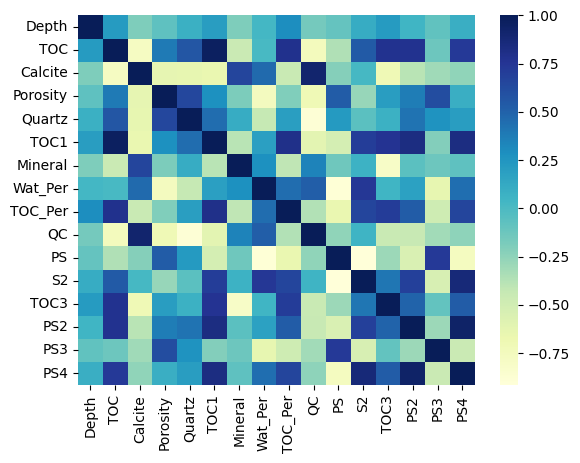

In [41]:
sns.heatmap(df_1.corr(), cmap="YlGnBu")
plt.show()

#### considering features which are very highly correalted with r >=0.9 

In [42]:

# TOC,TOC1 are very highly correlated with coefficient 0.96
# Calcite , QC are very highly correlated with coefficeint 0.93
# PS2, PS4 are  very highly correlated with coefficient 0.90


In [43]:
# representing all those columns by dropping very highly correlated columns
X = df_1.drop(['TOC1','QC','PS2'],axis=1)
y = df['Swirr']

### dimensionality reduction 

In [44]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns = X.columns)
df_scaled

,Depth,TOC,Calcite,Porosity,Quartz,Mineral,Wat_Per,TOC_Per,PS,S2,TOC3,PS3,PS4
0,-1.668802,0.306918,-0.724543,1.934373,0.757029,-0.126222,-1.015665,-0.716769,1.171821,-0.796455,-0.072303,2.024652,-0.406894
1,-1.651659,0.305027,-0.305459,1.419276,1.500313,0.972016,-0.757551,-0.529498,0.616673,-0.424499,-0.490488,1.106589,0.077276
2,-1.634435,-0.250015,-0.550759,0.251443,0.813650,0.093845,-0.875655,-0.419869,0.951536,-0.951067,-0.448523,0.774111,-0.875171
3,-1.617291,-2.464763,2.110780,1.408377,-1.717402,1.822361,-0.546184,-2.455047,0.163694,0.086708,-1.756703,-0.085786,0.860191
4,-1.599258,0.112362,-0.683810,0.955981,0.585460,-0.247538,-0.856092,-0.471751,0.865219,-0.757312,-0.082997,1.301336,-0.522261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.682271,-1.350870,1.245099,-1.343558,-1.771019,-0.597012,0.107936,-0.662449,0.239119,-0.738412,-0.910064,-0.652403,-0.940121
188,1.698121,-1.210834,1.873890,-1.163740,-1.303832,0.444611,0.346523,-0.588573,-0.077602,-0.406773,-1.078338,-0.655209,-0.686696
189,1.713970,-1.741007,2.110780,-1.756033,-1.446222,1.727665,2.218979,-1.072188,-0.994343,0.534088,-1.462671,-0.655758,-0.437997
190,1.729820,-1.564802,2.110780,-1.688363,-1.165260,1.166302,1.407977,-0.732314,-0.447995,-0.154429,-1.348325,-0.655754,-0.726214


In [46]:
# Initializing the PCA object
pca = PCA()
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)

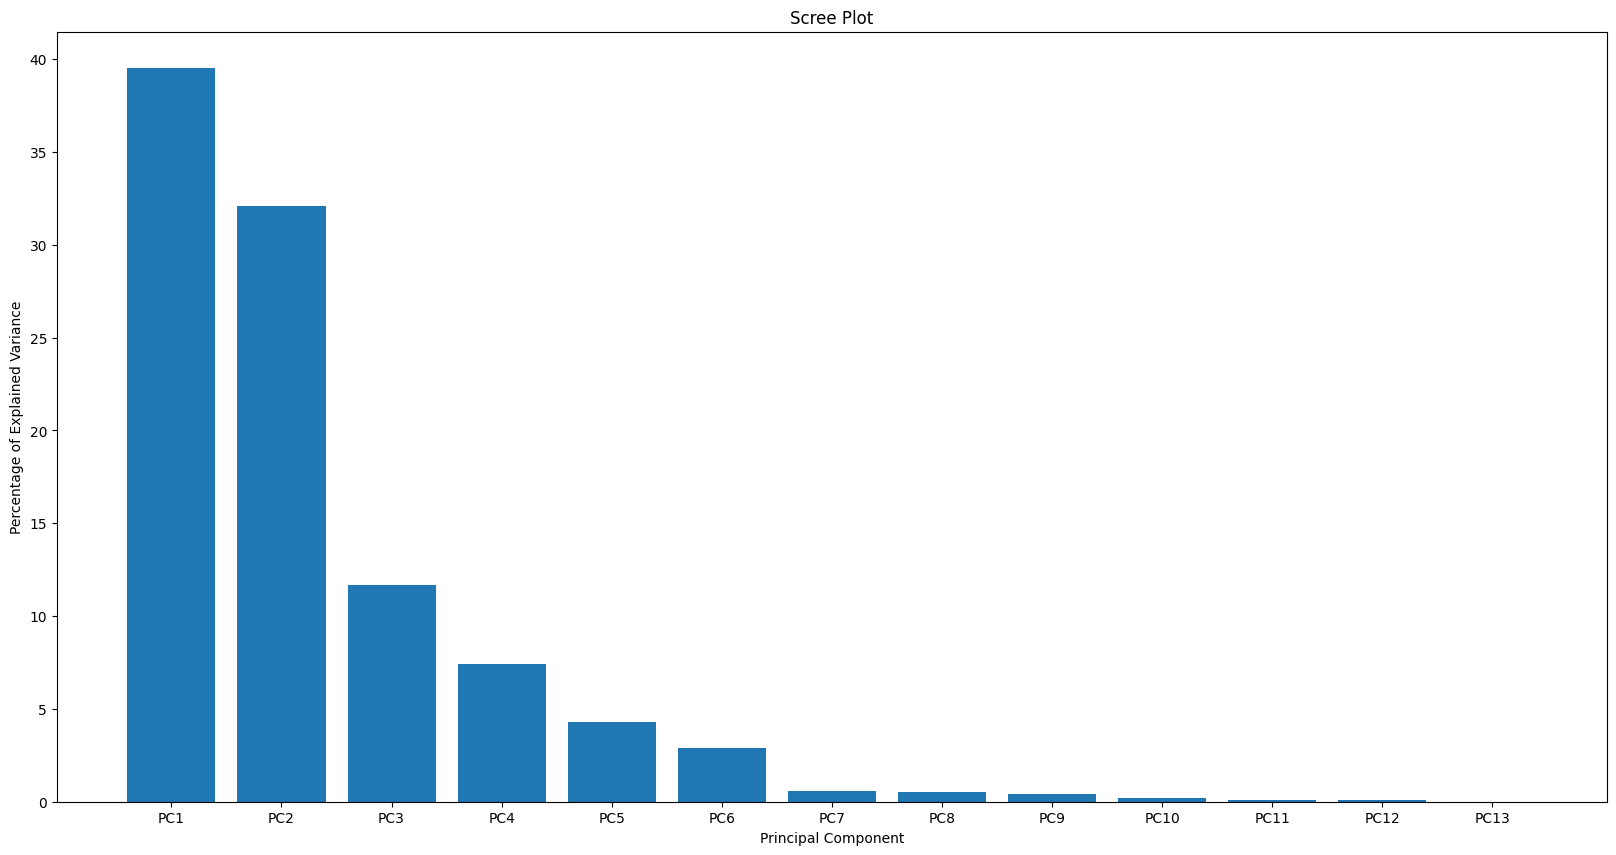

In [47]:
percentage_variance = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]
 
plt.figure(figsize=(20, 10))
plt.bar(x=range(1,len(percentage_variance)+1), height=percentage_variance, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [48]:
percentage_variance

array([39.5, 32.1, 11.7,  7.4,  4.3,  2.9,  0.6,  0.5,  0.4,  0.2,  0.1,
        0.1,  0. ])

In [49]:
# Total percentage variance should be minimum 85 
# so by considering pc1,pc2,pc3,pc4 the percentage of variance is 90.7

In [50]:
pc_1 = pd.DataFrame(pca_data, columns = labels)
# Selecting the top 4 pca columns for the analysis
pca_df = pc_1[['PC1','PC2','PC3','PC4']]
# adding output label to the data
pca_df['Swirr'] = df['Swirr']

C:\Users\vasuk\AppData\Local\Temp\ipykernel_26416\290579096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['Swirr'] = df['Swirr']


In [51]:
pca_df.head()

,PC1,PC2,PC3,PC4,Swirr
0,-2.275224,-2.440792,1.040603,1.615321,7.113304
1,-1.551864,-1.408908,2.277682,1.075112,9.364680
2,-2.064952,-0.973259,0.544281,1.037283,5.931133
3,-2.891093,2.915411,1.759817,1.754274,11.776418
4,-1.783707,-1.662594,0.516143,1.407179,7.382626


In [52]:
X = pca_df.drop('Swirr',axis=1)
y = pca_df['Swirr']

### Hyper parameter tuning for PCA components

In [53]:
from sklearn.model_selection import train_test_split
# Train and test data split
X_train_pc, X_test_pc, y_train_pc, y_test_pc  = train_test_split(scaled_X, y, test_size = 0.3, random_state = 100)

### For SVR model

In [54]:
m1 = SVR(kernel='poly',degree=2)
m2 = SVR(kernel='RBF')
m3 = GradientBoostingRegressor()
m4 = RandomForestRegressor()

In [55]:
# Hypere parameter validation for SVM polynomial regressor 
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
m1  = SVR(kernel='poly')
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['poly'],
             'degree':[2]}
random = RandomizedSearchCV(m1, param_grid,cv=5,random_state=0)
random.fit(X_train_pc,y_train_pc)

RandomizedSearchCV(cv=5, estimator=SVR(kernel='poly'),
                   param_distributions={'C': [0.1, 1, 10, 100], 'degree': [2],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['poly']},
                   random_state=0)

In [56]:
random.best_params_

{'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 10}

In [57]:
# best model for the svr rbf kernel
model_1 = SVR(kernel= 'poly', gamma= 1, C= 10, degree= 2)
model_1.fit(X_train_pc,y_train_pc)

SVR(C=10, degree=2, gamma=1, kernel='poly')

In [58]:
# finding the metrics for this model 
from sklearn import metrics
y_pred_test = model_1.predict(X_test_pc)
mae = metrics.mean_absolute_error(y_test_pc, y_pred_test)
mse = metrics.mean_squared_error(y_test_pc, y_pred_test)
r2 = metrics.r2_score(y_test_pc, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.3911618607553747
MSE is 2.045552195627409
R2 score is 0.9148252925850162


In [59]:
# Hyper parameter tuning for the SVM RBF kernel
m2  = SVR(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']
             }
random = RandomizedSearchCV(m2, param_grid,cv=5,random_state=0)
random.fit(X_train_pc,y_train_pc)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [60]:
random.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}

In [61]:
# best model for the svr rbf kernel
model_2 = SVR(kernel= 'rbf', gamma= 0.1, C= 100)
model_2.fit(X_train_pc,y_train_pc)

SVR(C=100, gamma=0.1)

In [62]:
y_pred_test = model_2.predict(X_test_pc)
mae = metrics.mean_absolute_error(y_test_pc, y_pred_test)
mse = metrics.mean_squared_error(y_test_pc, y_pred_test)
r2 = metrics.r2_score(y_test_pc, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.3995560781197685
MSE is 2.232877231372954
R2 score is 0.9070252691266882


In [63]:
#Hyper parameter tuning for the Gradient boosting regressor 
m3 = GradientBoostingRegressor()
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01,0.1],
           'n_estimators': [100,200,500]
           }
clf = RandomizedSearchCV(estimator = m3, param_distributions = params, n_iter = 100, 
                               cv = 5, verbose=2, random_state=42, n_jobs = -1)
clf.fit(X_train_pc,y_train_pc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, verbose=2)

In [64]:
clf.best_params_

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

In [65]:
# Get feature importances
# Get the names of the features

model_3 = GradientBoostingRegressor(n_estimators= 200, max_depth= 3, learning_rate= 0.1)

model_3.fit(X_train_pc,y_train_pc)

GradientBoostingRegressor(n_estimators=200)

In [66]:
# testin the data 
y_pred_test = model_3.predict(X_test_pc)
mae = metrics.mean_absolute_error(y_test_pc, y_pred_test)
mse = metrics.mean_squared_error(y_test_pc, y_pred_test)
r2 = metrics.r2_score(y_test_pc, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.13405417930242294
MSE is 0.2113901399643649
R2 score is 0.9911979301430855


In [ ]:
'''This is the information on the model performance for the testing set after hyperparameter tuning using RandomizedSearchCV with a Random Forest Regressor:

Mean Absolute Error (MAE) is 0.13405417930242294.
Mean Squared Error (MSE) is 0.2113901399643649.
R-squared (R2) score is 0.9911979301430855.
These metrics are used to evaluate the performance of the model. A lower MAE and MSE indicates better performance, while a higher R2 score indicates a better fit of the model to the data. These values 
suggest that the model is performing well on the testing set after hyperparameter tuning.
'''

In [67]:
# Create a random forest regressor object
m4 = RandomForestRegressor()
# Define the hyperparameter grid

params = { 'bootstrap': [True],
    'max_depth': [30,50,70],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150, 200]}
# Perform randomized search cross-validation

clf = RandomizedSearchCV(estimator = m4, param_distributions = params, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
clf.fit(X_train_pc,y_train_pc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [30, 50, 70],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [ ]:
'''The code snippet performs hyperparameter tuning for a random forest regressor model
using RandomizedSearchCV. The RandomForestRegressor() function is used to create a random forest 
regressor object. A hyperparameter grid is defined using a dictionary containing the hyperparameters and their corresponding values. The RandomizedSearchCV() function is then used to perform randomized search cross-validation with 100 iterations, 3-fold cross-validation, and parallel processing with -1 number of jobs. The best set of hyperparameters is selected based on the highest mean cross-validation score, which is evaluated using the score()
method of the RandomizedSearchCV() object.
'''

In [68]:
clf.best_params_
#Assuming clf is an instance of GridSearchCV or RandomizedSearchCV, the best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 50,
 'bootstrap': True}

In [69]:
# Best random forest regressormodel_4 = RandomForestRegressor(n_estimators= 200,
 min_samples_split= 8,
 min_samples_leaf=3,
 max_features=3,
 max_depth=50,
 bootstrap=True)
model_4.fit(X_train_pc,y_train_pc)

RandomForestRegressor(max_depth=50, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [70]:
# Test data results
y_pred_test = model_4.predict(X_test_pc)
mae = metrics.mean_absolute_error(y_test_pc, y_pred_test)
mse = metrics.mean_squared_error(y_test_pc, y_pred_test)
r2 = metrics.r2_score(y_test_pc, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.74356138337278
MSE is 2.858946835053689
R2 score is 0.8809563692819862


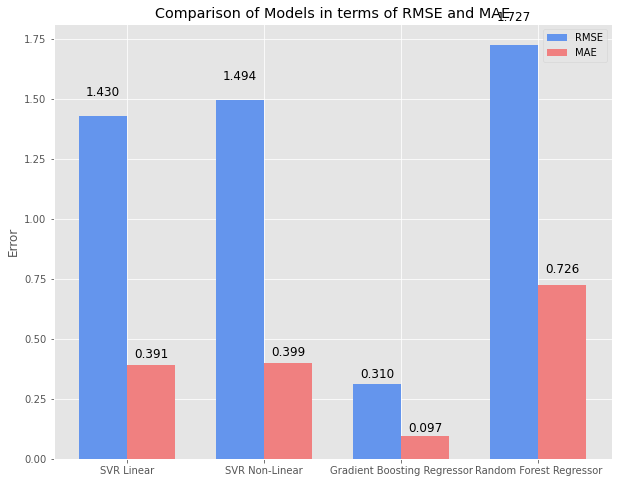

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# MSE and MAE values for four models
mae = [0.391, 0.399, 0.097, 0.726]
mse = [2.045, 2.233, 0.096, 2.983]
rmse = np.sqrt(mse)
model_names = ['SVR Linear', 'SVR Non-Linear', 'Gradient Boosting Regressor', 'Random Forest Regressor']

# Set the plot style
plt.style.use('ggplot')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Define the bar widths and positions
bar_width = 0.35
r1 = np.arange(len(mae))
r2 = [x + bar_width for x in r1]

# Plot the RMSE and MAE bars
ax.bar(r1, rmse, color='cornflowerblue', width=bar_width, label='RMSE')
ax.bar(r2, mae, color='lightcoral', width=bar_width, label='MAE')

# Add x-axis tick labels and legend
ax.set_xticks([r + bar_width/2 for r in range(len(model_names))])
ax.set_xticklabels(model_names)
ax.legend()

# Add labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., 1.05 * height,
                '%.3f' % height, ha='center', va='bottom', fontsize=12)

add_labels(ax.containers[0]) # RMSE bars
add_labels(ax.containers[1]) # MAE bars

# Set the y-axis label
ax.set_ylabel('Error')

# Add a title
ax.set_title('Comparison of Models in terms of RMSE and MAE')

# Show the plot
plt.show()


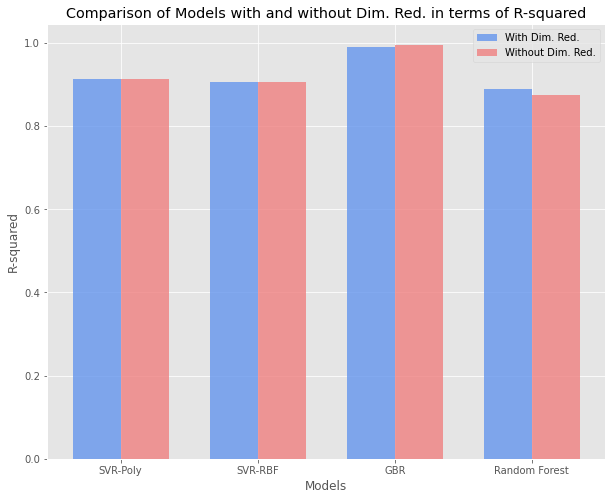

In [56]:

#It has been noted that SVR Non-linear and Gradient Boost Regressor 
#had the lowest RMSE and MAE, respectively. The maximum RMSE and MAE were obtained using Random Forest.

import matplotlib.pyplot as plt
import numpy as np

# R-squared scores with and without dimensionality reduction
with_dim_red = [0.914, 0.907, 0.991, 0.889]
without_dim_red = [0.914, 0.907, 0.996, 0.875]

model_names = ['SVR-Poly', 'SVR-RBF', 'GBR', 'Random Forest']

# Set the plot style
plt.style.use('ggplot')

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(model_names))

with_dim_red_bars = ax.bar(index, with_dim_red, bar_width, alpha=opacity, color='cornflowerblue', label='With Dim. Red.')
without_dim_red_bars = ax.bar(index + bar_width, without_dim_red, bar_width, alpha=opacity, color='lightcoral', label='Without Dim. Red.')

ax.set_xlabel('Models')
ax.set_ylabel('R-squared')
ax.set_title('Comparison of Models with and without Dim. Red. in terms of R-squared')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Add labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., 1.05 * height,
                '%.2f' % height, ha='center', va='bottom')

